In [1]:
import tensorflow as tf


In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.19.0'

In [4]:
keras.__version__

'3.10.0'

In [6]:
# default dataset from keras
fashion_mnist = keras.datasets.fashion_mnist

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

Creating the Model Using the Sequential API

In [13]:
model = keras.models.Sequential() # Sequential API

In [15]:
model.add(keras.layers.Flatten(input_shape=[28, 28])) #  to convert each input image into a 1D array
model.add(keras.layers.Dense(300, activation="relu")) # (num of neurons, activation function)
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # (10 neurons, one per class), softmax -- exclusive multiple classes

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Instead of adding the layers one by one as we just did, you can pass a list of layers
when creating the Sequential model:


In [16]:
model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.Dense(300, activation="relu"),
 keras.layers.Dense(100, activation="relu"),
 keras.layers.Dense(10, activation="softmax")
])


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [29]:
hidden1 = model.layers[1]

In [30]:
model.get_layer('dense_3').name

'dense_3'

In [31]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.0550561 ,  0.00397849,  0.0508251 , ...,  0.02737792,
        -0.00138116, -0.0189507 ],
       [-0.01800621, -0.01696496,  0.0239665 , ..., -0.05692995,
        -0.02421558,  0.06579541],
       [-0.00701456, -0.05523183,  0.05126703, ..., -0.00418017,
        -0.00080333,  0.04543961],
       ...,
       [ 0.01888885,  0.06495468, -0.00837805, ...,  0.03461304,
        -0.06642312,  0.0429611 ],
       [-0.03050301, -0.01091717,  0.05390881, ..., -0.06774835,
         0.07231368, -0.05440074],
       [ 0.03189658, -0.01131944, -0.0124049 , ..., -0.03747592,
        -0.0683751 ,  0.07306606]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [34]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [33]:
biases.shape

(300,)

The shape of the weight matrix depends on the number of inputs.
This is why it is recommended to specify the input_shape when
creating the first layer in a Sequential model.

**Compiling the Model**

After a model is created, you must call its compile() method to specify the loss func‐
tion and the optimizer to use.

In [38]:
model.compile(loss="sparse_categorical_crossentropy", # spares cross_entropy loss
 optimizer="sgd", # backpropagation algorithm
 metrics=['accuracy'])

Backward propagation = reverse-mode autodiff + Gradient Descent

**Train the model**

In [39]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6905 - loss: 0.9846 - val_accuracy: 0.8282 - val_loss: 0.5168
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8233 - loss: 0.5075 - val_accuracy: 0.8456 - val_loss: 0.4441
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8426 - loss: 0.4532 - val_accuracy: 0.8458 - val_loss: 0.4467
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8488 - loss: 0.4299 - val_accuracy: 0.8594 - val_loss: 0.4162
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8598 - loss: 0.4015 - val_accuracy: 0.8682 - val_loss: 0.3806
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8657 - loss: 0.3831 - val_accuracy: 0.8682 - val_loss: 0.3771
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8697 - loss: 0.3735 - val_accuracy: 0.8702 - val_loss: 0.3672
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8727 - loss: 0.3594 - 

In [40]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [41]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [42]:
history.history

{'accuracy': [0.7618181705474854,
  0.8280909061431885,
  0.843818187713623,
  0.8522909283638,
  0.8599454760551453,
  0.8659454584121704,
  0.8703818321228027,
  0.8744000196456909,
  0.8780727386474609,
  0.8794000148773193,
  0.8833090662956238,
  0.886054515838623,
  0.8892909288406372,
  0.8902727365493774,
  0.892727255821228,
  0.8929818272590637,
  0.8969272971153259,
  0.8986181616783142,
  0.9005091190338135,
  0.9022181630134583,
  0.9035636186599731,
  0.9040908813476562,
  0.9068182110786438,
  0.9092545509338379,
  0.9106000065803528,
  0.9125636219978333,
  0.9131454825401306,
  0.9139817953109741,
  0.9159818291664124,
  0.9184727072715759],
 'loss': [0.7205619812011719,
  0.492375910282135,
  0.44640764594078064,
  0.4192665219306946,
  0.3986339569091797,
  0.38105109333992004,
  0.36848583817481995,
  0.35603415966033936,
  0.3452436327934265,
  0.3360292911529541,
  0.3275715112686157,
  0.31916573643684387,
  0.31265899538993835,
  0.30520734190940857,
  0.2986431

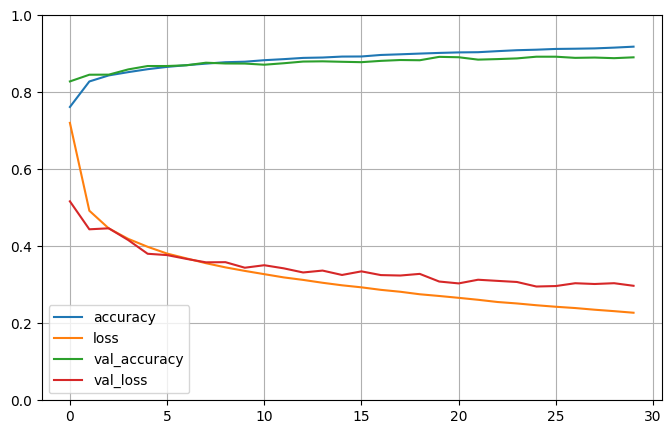

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [45]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8278 - loss: 71.9344


[75.6348876953125, 0.824999988079071]

In [46]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [54]:
predict_x=model.predict(X_test)
y_pred=np.argmax(predict_x,axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [55]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', ..., 'Bag', 'Trouser',
       'Sandal'], dtype='<U11')

In [56]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Now you know how to build, train, evaluate and use a classification MLP using the Sequential API. But what about regression?

**Regression MLP**

In [69]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load from Excel (offline)
housing = pd.read_excel("/content/fetch_california_housing.xlsx")

housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [81]:
housing.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [74]:
y = housing['target']
X = housing.drop(columns='target', axis=1)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y)

In [75]:
X_train, X_valid, y_train, y_valid = train_test_split(
 X_train_full, y_train_full)

In [83]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

Build regression MLP with Sequential API

In [84]:
model = keras.models.Sequential([
 keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
 keras.layers.Dense(1)
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train_scaled, y_train, epochs=20,
 validation_data=(X_valid_scaled, y_valid))
mse_test = model.evaluate(X_test_scaled, y_test)
X_new = X_test_scaled[:3] # pretend these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3091 - val_loss: 0.5214
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5677 - val_loss: 0.5965
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 39.8619 - val_loss: 0.4927
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4817 - val_loss: 0.4517
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4590 - val_loss: 0.4346
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4605 - val_loss: 0.4239
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4655 - val_loss: 0.4191
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4317 - val_loss: 0.4119
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4360 - val_loss: 0.4101
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4221 - val_loss: 0.4033
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4091 - val_loss: 0.3993
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

In [86]:
y_pred

array([[1.1628228],
       [2.185517 ],
       [1.1789756]], dtype=float32)